# **Reducción de Dimensionalidad**

***Curse of dimensionality***. Conjunto de problemas que surgen cuando se trabaja con datos de alta dimensionalidad.

Reducir la dimensionalidad henera pérdida de información, así que, a pesar de aumentar la velocidad del entrenamiento, puede causar también que tenga un peor rendimiento. También hace a las pipelines más complejas y más difíciles de mantener.

```Antes de realizar Reducción de Dimensionalidad tratar de entrenar al sistema con los datos originales. Normalmente genera un aumento en la velocidad, no en el rendimiento.```

```A mayor cantidad de dimensiones tiene un dataset, más posibilidad existe de sobreajuste.```

## **Enfoques de reducción de dimensionalidad**
---

**Proyección**. Se tiene un conjunto de datos de alta dimensionalidad y se "proyecta" en un espacio de menor dimensión (por ejemplo, obtener la sombra de una figura 3D en un plano 2D). La idea es conservar tanta información como sea posible mientras se reduce la dimensionalidad.

**Manifold**. Los datos pueden existir en un espacio de alta dimensión, de forma compleja y curva ("arrugada"), pero en realidad, si se pudieran "desplegar", ocuparían más espacio en un menos dimensiones (como alisar un papel hecho bolita), tratando de no perder la estructura esencial que define la relación entre los datos representados.



## **Principal Component Analysis (PCA)**
---
Primeramente, identifica el hiperplano que se establece más cercano a los datos, y luego proyecta los datos en él.
El Hiperplano que se elegie es el que **tenga mayor varianza**, porque pierde menos información, y también porque **este eje minimiza la distancia del error cuadrático** entre el conjunto original y su proyección en el eje.

### **Componentes principales**

PCA identifica el eje que contenga la varianza más grande en el conjunto de entrenamiento. Luego define el segundo eje, ortognoal al primero, que contenga la mayor cantidad de varianza restante. Si existiera un tercer eje, lo encontraría de igual manera, ortogonal al anterior, y así sucesivamente hasta alcanzar el número de dimensiones del conjunto de datos.

```La unidad de vector que define el eje i_th es llamado *componente principal i_ésimo*```

**La dirección del componente principal no es estable: si se perturba el conjunto de entrenamineto un poco, algunos de los nuevos Componentes Principales se posicionarán en la dirección opuesta del componente principal original.**

**PCA asume que el dataset está centrado sobre el origen. La clase de Scikit-Learn se asegura de esto. Pero si se implementa por propia cuenta, no hay que olvidar centrar los datos primero.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [ ]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [ ]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [ ]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [ ]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [ ]:
X2D_using_svd = X2D

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [ ]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [ ]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [ ]:
np.allclose(X2D, -X2D_using_svd)

True

In [ ]:
X3D_inv = pca.inverse_transform(X2D)

In [ ]:
np.allclose(X3D_inv, X)

False

In [ ]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.01017033779284855

In [ ]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

In [ ]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

In [ ]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [ ]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

## **Tasa de varianza**
---
La ***explained vairance ratio*** de cada componente principal indica la proporción de la varianza del dataset a lo largo del eje de su eje.

In [ ]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

Esto nos dice que hay 84.2% de varianza del dataset que se encuentra en el primer eje, y 14.63% que se encuentra en el segundo eje.

In [ ]:
pca.explained_variance_ratio_.sum()

0.988804464429311

In [ ]:
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])



## **Elegir el número correcto de Dimensiones**
* Generalmente escoger dimensiones que alcancen un proporción suficientemente grande de varianza (por ejemplo, 95%).
* Se puede ajustar *n_components* con un flotante entre 0.0 y 1.0, indicando la tasa de varianza que se desea preservar.
* Otra opción es graficar la *explained vairnce* como una función del número de dimensiones.


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml("mnist_784", as_frame=False, cache=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
pca = PCA()

pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
d

154

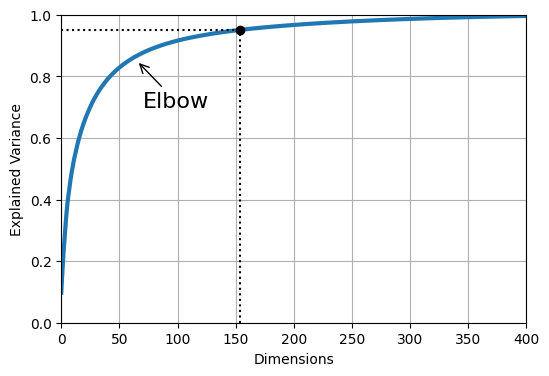

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

Otra forma de hacerlo más sencillo.

In [ ]:
pca = PCA(n_components=0.95)
X_reduces = pca.fit_transform(X_train)

In [ ]:
pca.n_components_

154

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557439

## **PCA para Compresión**
---
La aplicación de PCA al dataset de MNIST con un preservando un 95% de varianza logra obtener solo 154 características, en lugar de las 784 originales.

También es posible descomprimir el dataset reducido y regresar a las 784 dimensiones. **Esto no regresará a los datos originales, dado que la proyección perdió un poco de información (5%)**

***Reconstruction error***. La distancia media cuadrática entre los datos originales y los reconstruidos (comprimidos y descomprimidos).



In [ ]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# EXTRA
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

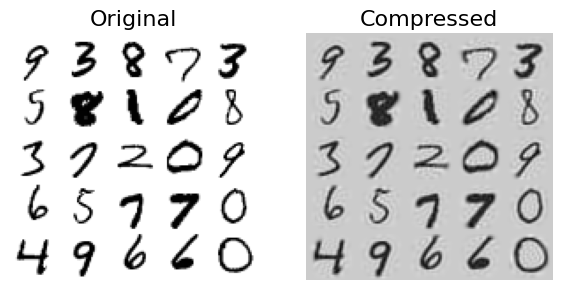

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

In [ ]:
X_reduces_pca = X_reduced

## **Randomized PCA**
---
Si se ajusta ```svd_sovler = "randomized"```, Scikit-Learn usará un algoritmo estocástico llamado *Randomized PCA* que rápidamente encuentra una aproximación del primer componente principal *d*. Es dramáticamente más rápido que SVD completo cuando *d* es mucho más pequeño que *n*.

*svd_solver*, por default está ajustado en *"auto"*: Usa automáticamente el algoritmo aleatorizado PCA si *m* o *n* son más grandes que 500 y *d* es menor que el 80% de *m* o *n*, o si no, utiliza la aproxmiación con el SVD completo.


In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## **Incremental PCA**
---
Un problema de PCA es que requiere todo el conjunto de entrenamiento en memoria para correr el algoritmo. Afortunadamente existe el algoritmo ***Incremental PCA (IPCA)***: Separas el conjunto de entrenamiento en mini-lotes y alimentas al algoritmo IPCA con un mini-lote a la vez. Esto es útil para conjuntos de entrenamiento grandes, y también aplica para PCA en linea.


In [ ]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
  print(".", end="")
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)


....................................................................................................

In [ ]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

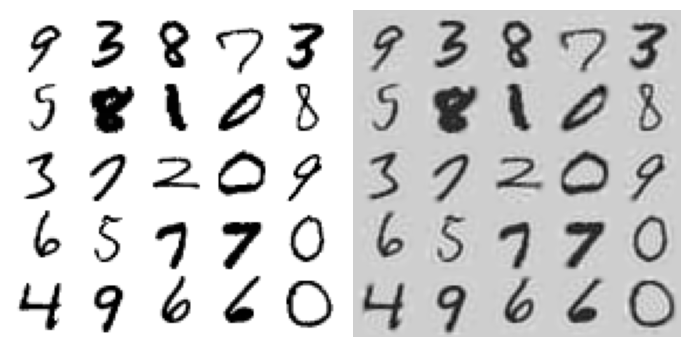

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [ ]:
X_reduced_inc_pca = X_reduced

In [ ]:
np.allclose(pca.mean_, inc_pca.mean_)

True

In [ ]:
np.allclose(X_reduces_pca, X_reduced_inc_pca)

False

**Utilizando ```memmap()```**

Esto lo haría normalmente un programa principal.

In [ ]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

Eliminares el objeto *memmap()*.

In [ ]:
del X_mm

In [ ]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)

In [ ]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components, svd_solver="full")
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for name, pca in (("PCA", regular_pca), ("Inc PCA", inc_pca), ("Rnd PCA", rnd_pca)):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(name, t2 - t1))

n_components = 2
    PCA: 22.8 seconds
    Inc PCA: 42.8 seconds
    Rnd PCA: 4.8 seconds
n_components = 10
    PCA: 20.8 seconds
    Inc PCA: 46.1 seconds
    Rnd PCA: 6.5 seconds
n_components = 154
    PCA: 21.3 seconds
    Inc PCA: 68.9 seconds
    Rnd PCA: 15.1 seconds


Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

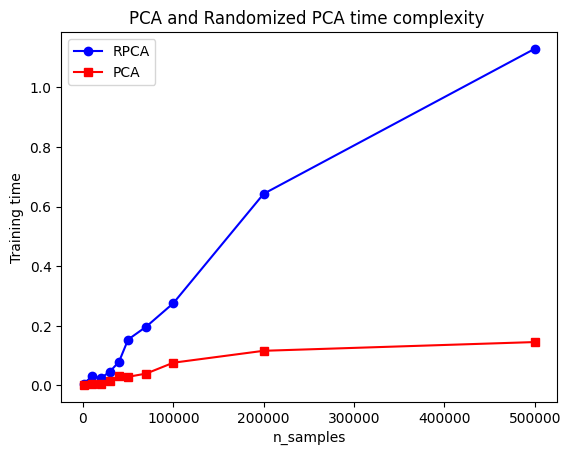

In [ ]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

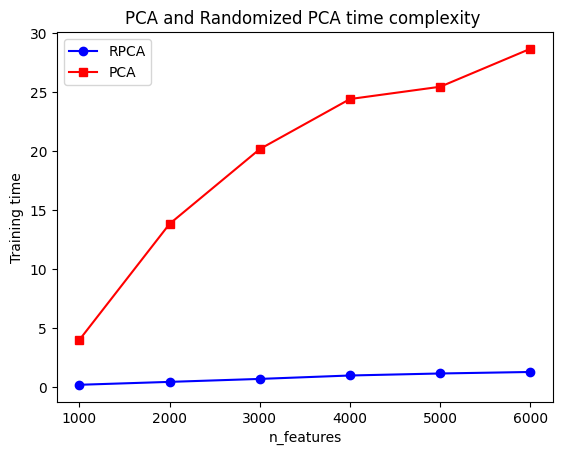

In [ ]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

## **Kernel PCA**

El mismo truco (*kernel trick*) que se aplica a las SVMs se puede aplicar a PCA, permitiendo ***realizar proyecciones complejas no lineales para reducir la dimensionalidad***, conocido como **Kernel PCA o (kPCA)**. A menudo es bueno para consevar clústers de instancias después de la proyección, o a veces, incluso apra desenrollar conjuntos de datos que se encuentran cerca de una variedad retorcida.


In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.004)
X_reduced = rbf_pca.fit_transform(X)

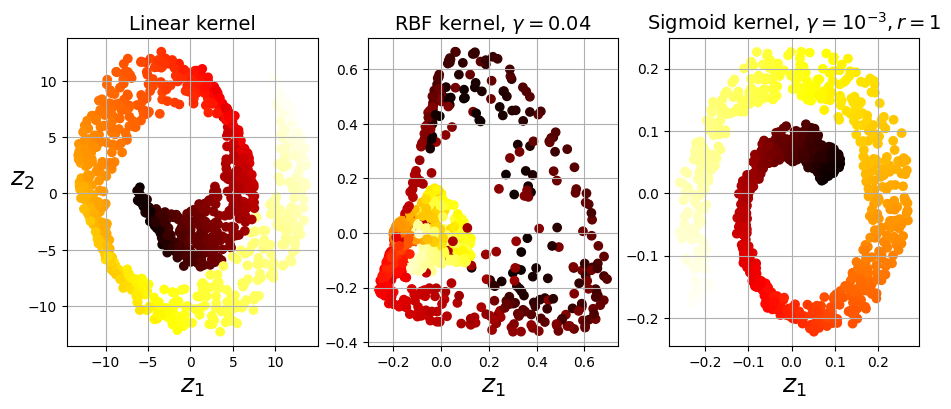

In [ ]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced

    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

En la figura de arriba se aprecio el *Swiss roll*, reducido a dos dimensiones empleando un kernel lineal (equivalente a simplemente utilizar la clase PCA), un kernel RBF, y un kernel sigmoid (Logístico).

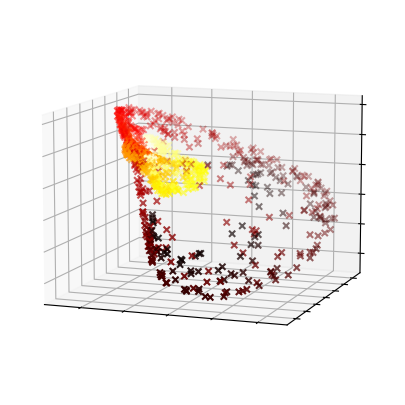

In [ ]:
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

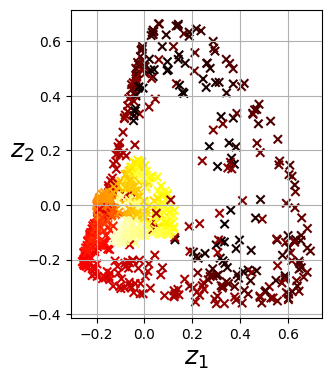

In [ ]:
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

## **Seleción de Kernel y afinación de Hiperparámetros**
---

kPCA es algoritmo de aprendizaje no supervisado, así que no existe una métrica de rendimiento para ayudar a seleccionar el mejor kernel y sus valores de hiperparámetros.

Entonces se utiliza simplemente una Grid Search para seleccionar el kernel e hiperparámetros para conseguir el mejor rendimiento en la tarea.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression(solver="lbfgs"))
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [ ]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [ ]:
rbf_pca = KernelPCA(n_components= 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576613

In [ ]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

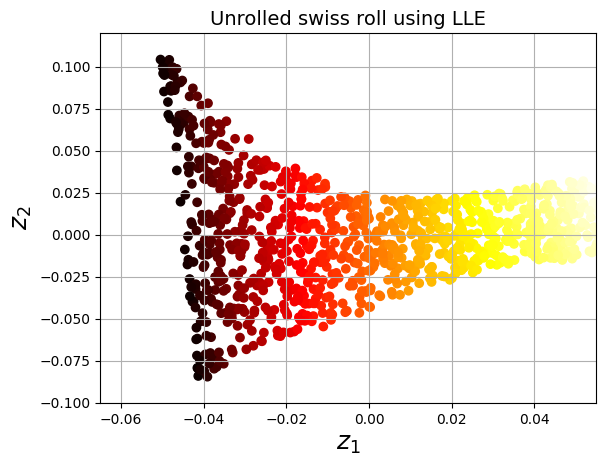

In [ ]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

# **Otras técnicas de reducción de dimensionalidad**
---

* **Multidimensional Scaling (MDS)**. Reduce dimensionalidad mientras trata de preservar las distancias entre las instancias.
* **Isomap**. Crea una gráfica conectando cada instancia a su vecino más cercano, luego reduciendo la dimensionalidad mientras trata de preservar las *distancias geodésicas* entre las instancias.
* **t-Distributed Stochastic Neighbor Embedding (t-SNE)**. Reduce dimensionalidad mientras trata de mantener las instancias similares cerca y las no similares aparte. Es mayormente usada para visualización, en aprticular para visualizar clusters de instancias en un espacio altamente dimensional.
* **Linear Discriminant Analysis (LDA)**. Es de hecho un algoritmo de clasificación, pero durante el entrenamiento aprende los ejes más discriminativas entre las clases, y esos ejes peude entonces ser usados para definir un hiperpalno en el cual proyecta los datos. mantiene las clases tan alejadas como sea posible.

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

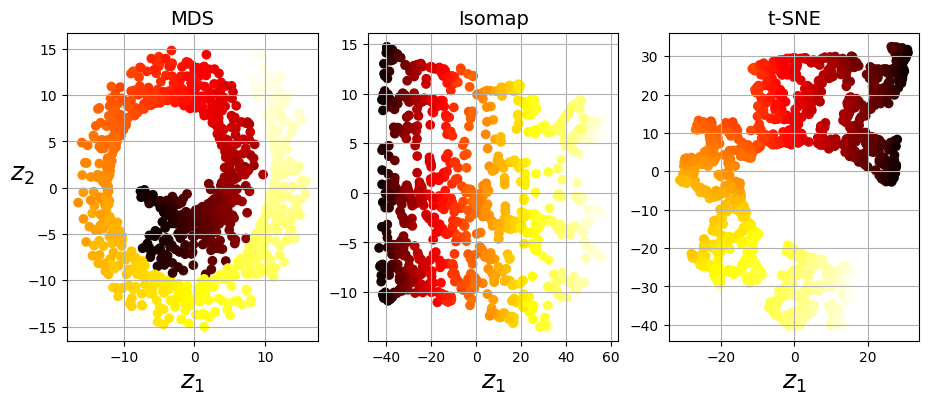

In [ ]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

# **EJERCICIOS**
---

**1. ¿Cuáles son las principales motivaciones para reducir la dimensionalidad de un dataset? ¿Cuáles son los principales inconvenientes?**

Cuando se tiene un conjunto de datos de millones de características para cada instancia, no solo vuelve al entrenamiento extremadamente lento, sino que también puede hacer que sea más difícil encontrar una buena solución.

Motivaciones:
* Aumento de la velocidad
* Visualización de los datos
* En algunos casos, mejor convergencia del modelo.

Inconvenientes:
* Perder información en los datos
* Peor rendimiento del modelo
* Pipelines más complejas y difíciles de mantener
* Dificultad de interpretación de las neuvas dimensiones.


**2. ¿Qué es la maldición de la dimensionalidad?**

Los conjuntos de datos de alta dimensión corren el riesgo de ser muy dispersos: es probable que la mayoría de las instancias estén lejos unas de otras.

```Cuantas más dimensiones tenga el conjunto de entrenamiento, mayor será el resigo de sobreajustarlo.```

**3. Una vez que la dimensionalidad de conjunto de datos ha sido reducida, ¿es posible revertir la operación? Si es así, ¿cómo? Si no lo es, ¿por qué?**

Si lo es. Se puede utilizar la transformación inversa de la proyección PCA. Dependiendo la varianza preservada, será la capacidad de reconstrucción exacta al conjunto de datos original.  

**4. ¿Puede un PCA ser usado para reducir la dimensionalidad de un dataset altamente no lineal?**

PCA es una técnica lineal. En el caso de un dataset altamente no lineal, se puede utilizar PCA Kernel.

**5. Supón que puedes realizar PCA en un conjunto de datos de mil dimensiones, ajustance la tasa de varianza explicada a 95%, ¿Cuántas dimensiones tendrá el conjunto de datos resultantes?**

Depende de cuántas características sean necesarias para lograr esa varianza explicada. No existe un valor en particular.

**6. ¿En qué casos se emplearía PCA vanilla, PCA Incremental, PCA Aleatorizado, o PCA Kernel?**

* Vanilla: Cuando todo el conjunto de datos cabe en memoria.
* Incremental: Cuando el conjunto de entrenamiento no se puede almacenar por completo en la memoria porque es muy  grande, o cuando se aplica PCA en linea. Separa el entrenamiento en mini-lotes.
* Randomized: Dramáticamente más rápido cuando el número de componentes principales es mucho más pequeño que el número de muestras.
* Kernel: Para realizar proyecciones complejas no lineales para reducir la dimensionalidad. Es bueno preservando clusters de instancias después de la proyección o desenrrollando datasets que se establecen en un *twisted manifold*.

**7. ¿Cómo se puede evaluar el rendimiento de un algoritmo de reducción de dimensionalidad en el conjunto de datos?**

Depende del contexto, en algunos casos se podría graficar el varianza explicada en función del número de simensiones. Dado que es un algoritmo no supervisado, no existe una métrica de rendimiento. La forma más simple de obtener los mejores hiperparámetros es con Grid Search y Cross-validation.

**8. ¿Tiene algún sentido encadenar dos algoritmos diferentes de reducción de dimensionalidad?**

Sí, tiene sentido en ciertos contexto. Cuando se quiere aprovechas las propiedades únicas de cada algoritmo para tratar diferentes aspectos de los datos, como combinar una reducción no lineal para desenredar los datos seguida de una lineal para reducir la dimensionalidad aún más.

## **9. Cargar el conjunto de datos MNIST y separarlo en training set y test set (tomar las primeras 60000 para training y las 10000 restantes para test). Entrenar un clasificador Random Forest y tomar el tiempo que tarda, luego evaluar el modelo en el test set. Después, usar PCA para reducir la dimensionalidad, con una tasa de varianza explicada de 95%. Entrenar nuevamente al modelo y ver cuánto tarda. ¿Fue más rápido? Luego, evaluar al clasificador en el test set: ¿Cómo se compara con el clasificador previo?**

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False, cache=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X_train, y_train = mnist["data"][:60000], mnist["target"][:60000]
X_test, y_test = mnist["data"][60000:], mnist["target"][60000:]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 100, random_state=42)

In [ ]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1= time.time()

In [ ]:
print("Training took {:.2f}s".format(t1-t0))

Training took 64.12s


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9705


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_reduced = pca.fit_transform(X_train)

In [ ]:
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)

t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

print("Time took: {:.2f}".format(t1-t0))

Time took: 256.64


El tiempo ahora es el doble de lentoc ¿cómo puede ser? La reducción de dimensionalidad no siempre consigue un menor tiempo de entrenamiento: depende del dataset, del modelo y del algoritmo de entrenamiento.

Por el momento, revisemos la precisión.

In [ ]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9481


Observamos que la reducción no dimensionalidad realmente no ayudó.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'float' object has no attribute '2f'

In [ ]:
print("Time took: {:.2f}".format(t1-t0))

Time took: 54.39


In [ ]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

In [ ]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print("Time took: {:.2f}".format(t1-t0))

Time took: 9.84


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9201

## **10. Usar t-SNE para reducir el conjunto de datos MNIST a dos dimensiones y graficar el resultado utilizando Matplotlib. Se puede emplear un scatterplot con 10 colores diferentes para representar cada imagen de la clase objetivo. De manera alterna, se puede escribir dígitos coloreados en la locación de cada instancia, o inclusive graficar las versión reducidas de las imágenes mismas (si graficas todas las ima´genes, la visualización será muy desordenada). Se debe conseguir una correcta visualización con los clusters de los dígitos bien separados. Tratar de usar otros algoritmos de reducción de dimensionalidad como PCA; LLE, o MDS y comparar los resultados de las visualizaciones.**

In [ ]:
import numpy as np

np.random.seed(42)

m= 10000
idx = np.random.permutation(60000)[:m]

X = mnist["data"][idx]
y = mnist["target"][idx]

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

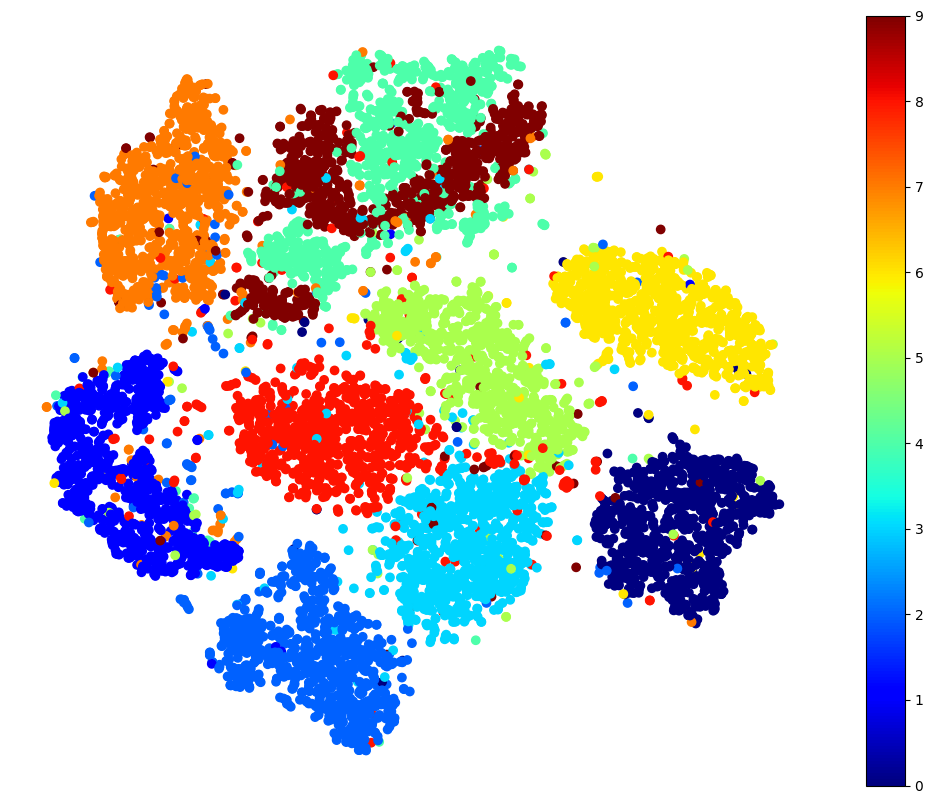

In [ ]:
from matplotlib import pyplot as plt

y_numeric = np.array(y).astype(float)

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_numeric, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

<ipython-input-51-531173b539b2>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_reduced[indices, 0], X_reduced[indices, 1], c=cmap(digit / 9), label=f"Digit {digit}")


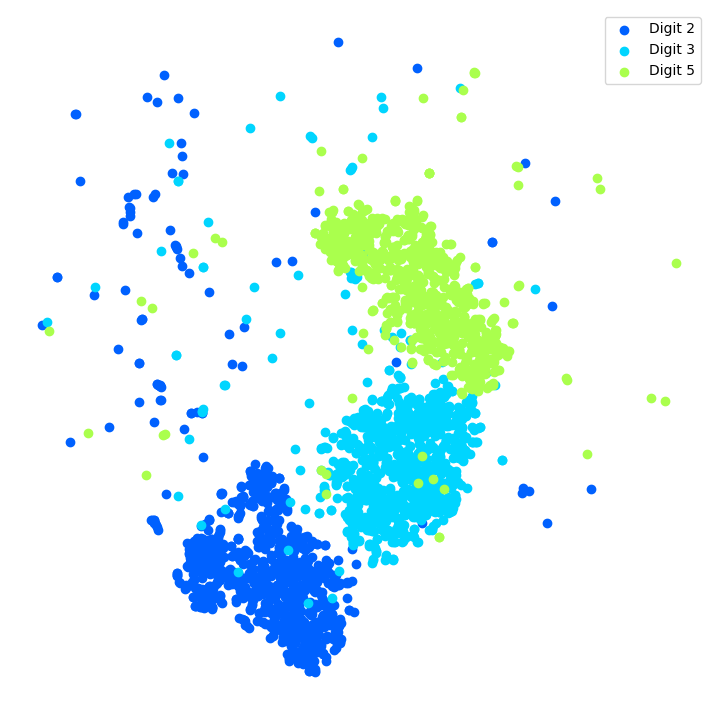

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.figure(figsize=(9,9))
cmap = cm.jet  # Acceder directamente al colormap jet

# Asegúrate de que y es un numpy array para hacer comparaciones de elementos
y_array = np.array(y)

for digit in (2, 3, 5):
    # Obtener índices donde y es igual a digit
    indices = np.where(y_array == str(digit))
    # Dibujar esos puntos
    plt.scatter(X_reduced[indices, 0], X_reduced[indices, 1], c=cmap(digit / 9), label=f"Digit {digit}")

plt.axis('off')
plt.legend()
plt.show()

Trataremos de producir una imagen más bonita.

In [ ]:
idx = (y==2) | (y==3) | (y==5)

X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

ValueError: perplexity must be less than n_samples

In [ ]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

Mucho mejor, ahora los clusters se traslapan menos. Hay dos clusters distintos para 2s y también para 5s. Sería interesante si se pudiera visualizar un par de dígitos de cada cluster, para entender por qué ocurre esto.

*Ejercicio: De manera alterna, se puede escribir dígitos coloreados en la locación de cada instancia, o inclusive graficar las versión reducidas de las imágenes mismas (si graficas todas las imágenes, la visualización será muy desordenada). Se debe conseguir una correcta visualización con los clusters de los dígitos bien separados.*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

In [ ]:
plot_digits(X_reduced, y)

In [ ]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

In [ ]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

*Ejercicio: Tratar de usar otros algoritmos de reducción de dimensionalidad como PCA, LLE, o MDS y comparar los resultados de las visualizaciones*

In [ ]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took: {:.2f}".format(t1-t0))
plot_digits(X_pca_reduced, y)
plt.show()

PCA took: 0.61


<ipython-input-54-9b8e5b35c1ec>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Figure size 1300x1000 with 0 Axes>

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took: {:.2f}".format(t1-t0))
plot_digits(X_lle_reduced, y)
plt.show()